In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [2]:
#load data
train=pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')
train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [3]:
test.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [4]:
#eda
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [6]:
print(train.shape)
print(test.shape)

(414, 8)
(276, 7)


In [7]:
train.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [8]:
test.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

In [9]:
train.ph.describe()

count    414.000000
mean       5.955459
std        0.642260
min        4.760000
25%        5.530000
50%        5.740000
75%        6.280000
max        7.940000
Name: ph, dtype: float64

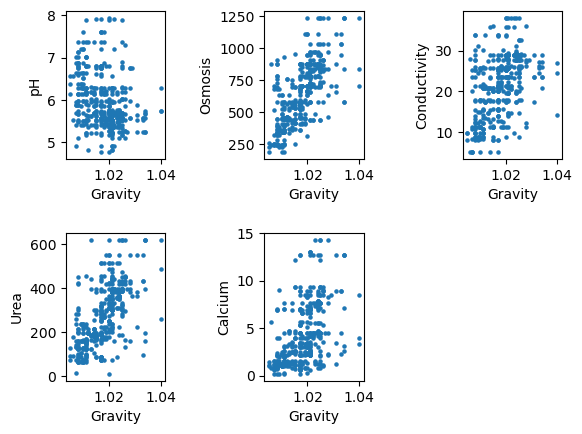

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
# Set the vertical/horizontal spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=1)

plt.subplot(2,3,1)
plt.scatter(train.gravity,train.ph,s=5)
plt.xlabel('Gravity')
plt.ylabel('pH')

plt.subplot(2,3,2)
plt.scatter(train.gravity,train.osmo,s=5)
plt.xlabel('Gravity')
plt.ylabel('Osmosis')

plt.subplot(2,3,3)
plt.scatter(train.gravity,train.cond,s=5)
plt.xlabel('Gravity')
plt.ylabel('Conductivity')

plt.subplot(2,3,4)
plt.scatter(train.gravity,train.urea,s=5)
plt.xlabel('Gravity')
plt.ylabel('Urea')

plt.subplot(2,3,5)
plt.scatter(train.gravity,train.calc,s=5)
plt.xlabel('Gravity')
plt.ylabel('Calcium')
plt.show()

In [11]:
X=train.drop(['target','id'],axis=1)
y=train.target
X.head()

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21


In [12]:
test2=test.drop('id',axis=1)
test2.head()

,gravity,ph,osmo,cond,urea,calc
0,1.017,5.24,345,11.5,152,1.16
1,1.020,5.68,874,29.0,385,3.46
2,1.024,5.36,698,19.5,354,13.00
3,1.020,5.33,668,25.3,252,3.46
4,1.011,5.87,567,29.0,457,2.36


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((277, 6), (137, 6), (277,), (137,))

In [14]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1500, learning_rate=0.0375)
my_model.fit(X_train, y_train,early_stopping_rounds=6,eval_set=[(X_valid, y_valid)],verbose=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0375, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [15]:
predictions = my_model.predict(test2)

In [16]:
output = pd.DataFrame({'id': test.id,
                       'target': predictions})
output.head()

,id,target
0,414,0.759304
1,415,0.776479
2,416,0.793199
3,417,0.398591
4,418,0.470079


In [17]:
output['target']=output['target'].round(decimals = 1)


In [18]:
output.head()

,id,target
0,414,0.8
1,415,0.8
2,416,0.8
3,417,0.4
4,418,0.5


In [19]:
output.to_csv('submissionplaygr3.csv', index=False)